## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 128, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_nuerons in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_nuerons, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_nuerons, activation="relu", name="hidden_layer"+str(i+1))(x)
    output_layer = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    return model

In [9]:
"""Code Here
設定超參數
"""
MOMENTUM = [0.95,0.5,0.1]
opts = {}
for M in MOMENTUM:
    opts['M-'+str(M)] = keras.optimizers.SGD(nesterov=False, momentum=M)
    opts['M-'+str(M)+' with nestrov'] = keras.optimizers.SGD(nesterov=True, momentum=M)
OPTS = list(opts.keys())
print(OPTS)
EPOCHS = 50
BATCH_SIZE = 256

['M-0.95', 'M-0.95 with nestrov', 'M-0.5', 'M-0.5 with nestrov', 'M-0.1', 'M-0.1 with nestrov']


In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for opt in OPTS:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment on %s" % opt)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = opts[opt]
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    results[opt] = {'train-loss': train_loss,
                    'valid-loss': valid_loss,
                    'train-acc': train_acc,
                    'valid-acc': valid_acc}

Experiment on M-0.95
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 903,178
Trainable params: 903,178
Non-trainable params: 0
___________________________

Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 0.6856 - accuracy: 0.7514 - val_loss: 1.6930 - val_accuracy: 0.5266
Experiment on M-0.95 with nestrov
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (

Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 0.4566 - accuracy: 0.8336 - val_loss: 2.1083 - val_accuracy: 0.5155
Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 0.4530 - accuracy: 0.8346 - val_loss: 2.2609 - val_accuracy: 0.5140
Experiment on M-0.5
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_lay

Epoch 48/50
196/196 [==============================] - 3s 13ms/step - loss: 1.0504 - accuracy: 0.6302 - val_loss: 1.4061 - val_accuracy: 0.5062
Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 1.0514 - accuracy: 0.6294 - val_loss: 1.3426 - val_accuracy: 0.5329
Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 1.0459 - accuracy: 0.6314 - val_loss: 1.3936 - val_accuracy: 0.5061
Experiment on M-0.5 with nestrov
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
___________________________________________________

Epoch 47/50
196/196 [==============================] - 3s 13ms/step - loss: 1.0938 - accuracy: 0.6119 - val_loss: 1.6075 - val_accuracy: 0.4547
Epoch 48/50
196/196 [==============================] - 2s 13ms/step - loss: 1.0962 - accuracy: 0.6137 - val_loss: 1.4352 - val_accuracy: 0.4983
Epoch 49/50
196/196 [==============================] - 2s 13ms/step - loss: 1.0738 - accuracy: 0.6219 - val_loss: 1.4581 - val_accuracy: 0.5015
Epoch 50/50
196/196 [==============================] - 2s 13ms/step - loss: 1.0675 - accuracy: 0.6227 - val_loss: 1.4666 - val_accuracy: 0.4973
Experiment on M-0.1
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
____________________________________________________

Epoch 46/50
196/196 [==============================] - 2s 13ms/step - loss: 1.2557 - accuracy: 0.5541 - val_loss: 1.6262 - val_accuracy: 0.4513
Epoch 47/50
196/196 [==============================] - 2s 13ms/step - loss: 1.2507 - accuracy: 0.5579 - val_loss: 1.5404 - val_accuracy: 0.4619
Epoch 48/50
196/196 [==============================] - 3s 13ms/step - loss: 1.2423 - accuracy: 0.5610 - val_loss: 1.3779 - val_accuracy: 0.5127
Epoch 49/50
196/196 [==============================] - 3s 13ms/step - loss: 1.2381 - accuracy: 0.5639 - val_loss: 1.4388 - val_accuracy: 0.4843
Epoch 50/50
196/196 [==============================] - 3s 13ms/step - loss: 1.2335 - accuracy: 0.5632 - val_loss: 1.4788 - val_accuracy: 0.4888
Experiment on M-0.1 with nestrov
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
___________________________

Epoch 45/50
196/196 [==============================] - 3s 13ms/step - loss: 1.2672 - accuracy: 0.5513 - val_loss: 1.3872 - val_accuracy: 0.5005
Epoch 46/50
196/196 [==============================] - 3s 13ms/step - loss: 1.2606 - accuracy: 0.5522 - val_loss: 1.5095 - val_accuracy: 0.4594
Epoch 47/50
196/196 [==============================] - 3s 13ms/step - loss: 1.2492 - accuracy: 0.5579 - val_loss: 1.5097 - val_accuracy: 0.4646
Epoch 48/50
196/196 [==============================] - 2s 13ms/step - loss: 1.2444 - accuracy: 0.5592 - val_loss: 1.4435 - val_accuracy: 0.4816
Epoch 49/50
196/196 [==============================] - 2s 13ms/step - loss: 1.2355 - accuracy: 0.5620 - val_loss: 1.4399 - val_accuracy: 0.4904
Epoch 50/50
196/196 [==============================] - 2s 13ms/step - loss: 1.2286 - accuracy: 0.5677 - val_loss: 1.4424 - val_accuracy: 0.4848


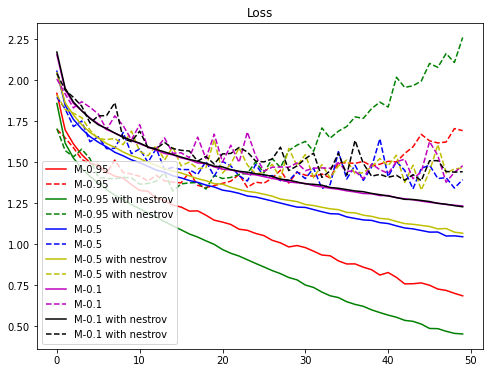

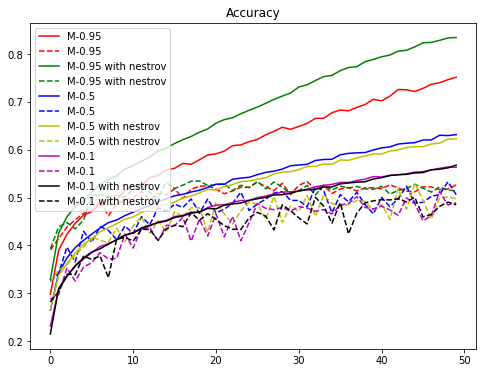

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()